# Critical Thinking 4 

## Gold Prices

<br>
Course Code: DS560 <br>
Course Name: Advanced Data Mining <br>
CRN: 24539 <br>
Dr. Mohammad Abdelrahman

Student ID: G200007615 <br>
Student Name: Abdulaziz Alqumayzi<br>
Date: 27/03/2021

#### Requirements 
- Colab or Jupyter notebook to run the code.
- Pandas, NumPy, Matplotlib and Sklearn packages.
- gld_price_data.csv file

## Table of contents:
- [Task-1](#task1)
- [Task-2](#task2)
- [Task-3](#task3)
- [Task-4](#task4)
- [Task-5](#task5)
- [Task-6](#task6)
- [Task-7](#task7)
- [Task-8](#task8)
- [References](#ref)

In [1]:
# importing needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<a id='task1'></a>
#### Task-1: 
Read the data as a dataframe.

In [2]:
gold_df = pd.read_csv('gld_price_data.csv')
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


<a id='task2'></a>
#### Task-2: 
Summarize the observations from the basic statistics you apply on the dataset. (Number of columns/rows; number of missing values -if any; datatype of each column; measures of central tendency and variability; etc).

In [3]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Number of columns**: 6<br>
**Number of rows**: 2290<br>
**Number of missing values**: There are no missing values as it shown in *Non-Null Count* column that returns from `info()` method<br>
**Columns data type**: *Date* column is object, the others are float. 

In [4]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Method `describe()` shows the most descriptive numeric values such as mean, median, minimum, maximum and standard deviation.

<a id='task3'></a>
#### Task-3: 
Convert data in each column into an appropriate data type.

In [5]:
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


Only *Date* column has to be changed.

<a id='task4'></a>
#### Task-4: 
Create visualizations that show the distribution of each numerical column.

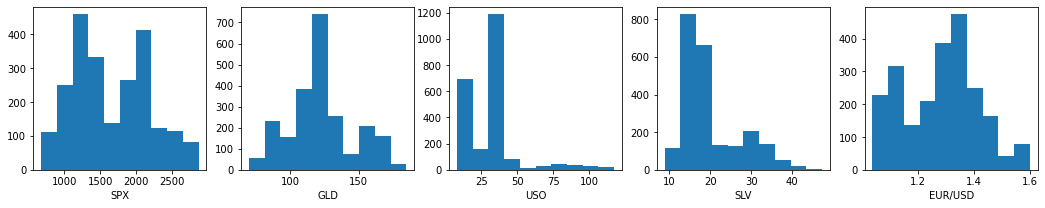

In [6]:
plt.figure(figsize = [18, 3])

plt.subplot(1, 5, 1)
plt.hist(gold_df['SPX'])
plt.xlabel('SPX')

plt.subplot(1, 5, 2)
plt.hist(gold_df['GLD'])
plt.xlabel('GLD')

plt.subplot(1, 5, 3)
plt.hist(gold_df['USO'])
plt.xlabel('USO')

plt.subplot(1, 5, 4)
plt.hist(gold_df['SLV'])
plt.xlabel('SLV')

plt.subplot(1, 5, 5)
plt.hist(gold_df['EUR/USD'])
plt.xlabel('EUR/USD');

**NOTE**:They are not the same scales.  

<a id='task5'></a>
#### Task-5: 
Group the data by year, considering the average price in each year.

In [7]:
# create a new column for "years"
gold_df['year'] = pd.DatetimeIndex(gold_df['Date']).year

In [8]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [9]:
# group the data by year on average 
year_df = gold_df.groupby('year')[['SPX','GLD','USO','SLV','EUR/USD']].mean()
year_df

,SPX,GLD,USO,SLV,EUR/USD
year,,,,,
2008,1208.337274,86.111148,77.528756,14.760708,1.464481
2009,945.604864,95.834464,34.145446,14.478527,1.393900
2010,1142.600627,119.966397,36.651847,19.922883,1.330050
2011,1268.544188,152.591486,37.781486,34.118063,1.389480
2012,1378.354519,162.151507,35.541598,30.349772,1.287449
2013,1642.193891,136.853213,35.014751,23.179909,1.329559
2014,1930.589375,121.721294,33.887277,18.276295,1.327894
2015,2061.795563,111.165561,16.527623,14.999596,1.109867
2016,2091.121803,118.780634,10.474525,16.161176,1.105778


<a id='task6'></a>
#### Task-6: 
Plot the data you got as an output from group by with time on the horizontal axis and gold price on the vertical. Be sure to provide a title and labels for the horizontal and vertical axes.

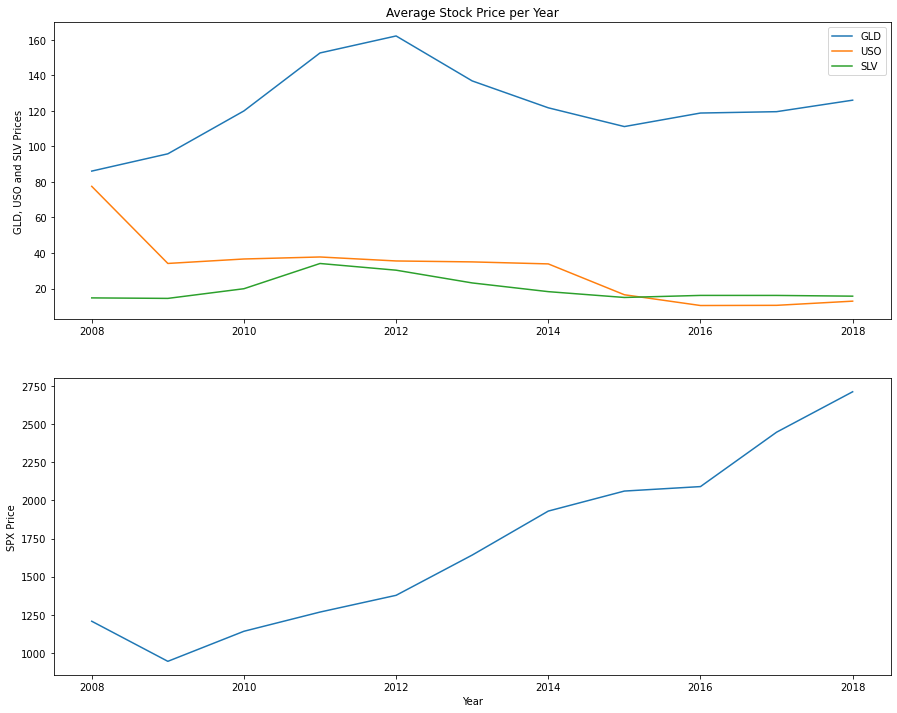

In [99]:
plt.figure(figsize = [15, 12])

plt.subplot(2, 1, 1)
plt.plot(year_df[['GLD','USO','SLV']])
plt.title('Average Stock Price per Year')
plt.ylabel('GLD, USO and SLV Prices')
plt.legend(['GLD','USO','SLV'])

plt.subplot(2, 1, 2)
plt.plot(year_df['SPX'])
plt.ylabel('SPX Price')
plt.xlabel('Year');

**SPX** scale is highly different from other stocks, so it should be drawn individually.

<a id='task7'></a>
#### Task-7: 
Visualize the gold price in the last ten years (choose the appropriate chart).

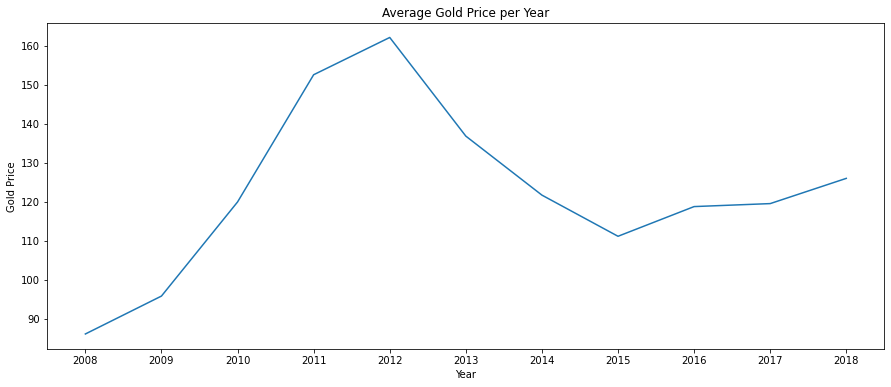

In [11]:
plt.figure(figsize = [15, 6])
plt.plot(year_df['GLD'])
plt.title('Average Gold Price per Year')
plt.xlabel('Year')
plt.xticks(np.arange(2008,2019))
plt.ylabel('Gold Price');

<a id='task8'></a>
#### Task-8: 
Create, then train a regression model, then use it to predict the gold price in the next five time periods.

In [90]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(np.array(year_df.index).reshape(-1,1),
                                                    year_df['GLD'], test_size=0.2) # 80% training and 20% test

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit (X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [91]:
y_pred

array([127.33736339, 121.48411925, 124.08556109])

In [100]:
# The coefficients
print('Coefficients: ', reg.coef_,'\n')

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred),'\n')

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [0.65036046] 

Mean squared error: 274.22 

Coefficient of determination: 0.09


### **NOTE**: These evaluation values are tricky, this dataset is highly small; so we cannot depend on it. 

In [95]:
# Creae an array of the nest five years
next_five_years = np.array([[2019,2020,2021,2022,2023]]).reshape(-1,1)

# Make predictions for the next five years
y_pred_next_five = reg.predict(next_five_years)

In [96]:
# predictions 
y_pred_next_five

array([127.98772385, 128.63808431, 129.28844477, 129.93880523,
       130.58916569])

#### Summary of Findings

This dataset is highly small; 10 years or (10 rows); to use in machine learning. We can increase the dataset by changing the scale from years into months or weeks to make more valuable insights and predictions. <br>

The mean squared error explains that there is a huge error in the model we built. 274 was the smallest result I got. before that, I was getting above 600 MSE. The reason for that is the dataset is highly small as I mentioned before.<br>  

This was a simple linear regression example that can be extended by constructing polynomial features from the coefficients. As we can see from Average Gold Price per Year chart. This is not linear relationship between the years and average gold price. 

<a id='ref'></a>
#### References
- Madhavan, S. (2015). Mastering Python for data science explore the world of data science through Python and learn how to make sense of data. Birmingham: Packt Publ.
- Convert the column type from string to datetime format in Pandas dataframe. (2020, October 05). Retrieved March 27, 2021, from https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- Extracting just month and year separately from Pandas datetime column. (1963, June 01). Retrieved March 27, 2021, from https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
- Linear regression example¶. (2021). Retrieved March 27, 2021, from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py